# Inflation
A look at inflation using various data.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
fred_api = os.getenv('fred_key')

In [2]:
from fredapi import Fred

fred = Fred(api_key=fred_api)


In [3]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# Seasonally Adjusted
df = fred.get_series('CPIAUCSL').to_frame('cpi')
df

AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'getchildren'

In [85]:
# CPI less Food and Energy, known as "Core CPI"
# widely used by economists because food and energy are highly volatile.
df["cpilfe"] = fred.get_series('CPILFESL')
df

,cpi,cpilfe
1947-01-01,21.480,NaN
1947-02-01,21.620,NaN
1947-03-01,22.000,NaN
1947-04-01,22.000,NaN
1947-05-01,21.950,NaN
...,...,...
2022-02-01,284.182,287.878
2022-03-01,287.708,288.811
2022-04-01,288.663,290.455
2022-05-01,291.474,292.289


In [86]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [87]:
plt.style.use('seaborn')

Core CPI looks less volatile.

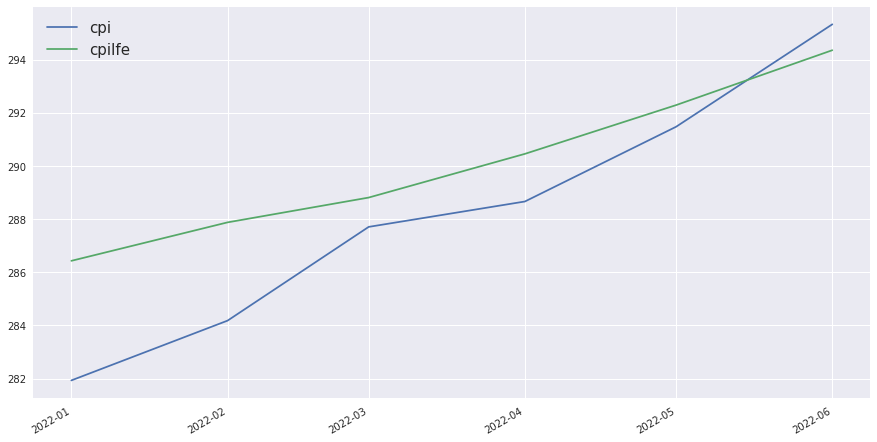

In [88]:
ax = df["2022":].plot(figsize=(15, 8), x_compat=True)
ax.legend(fontsize=15)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

Looks like the annualized monthly core cpi is the number we're reading from the news, but why was the last year's inflation higher than the recent one?

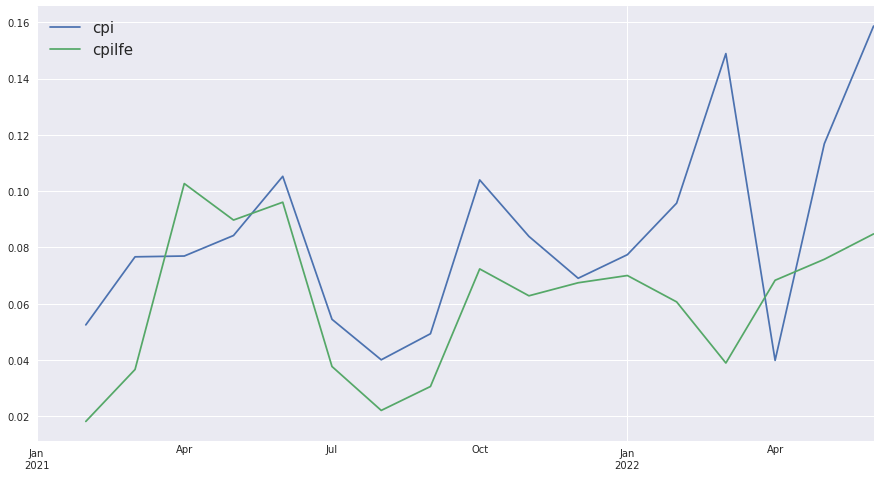

In [89]:
# Get annualized monthly inflation (core cpi)
df["2021":].resample('M').mean().pct_change().mul(12).plot(figsize=(15, 8))
plt.legend(fontsize=15)
plt.show()

CNBC news says that the inflation rose 8.6% in May from a year ago.
https://www.cnbc.com/2022/06/10/consumer-price-index-may-2022.html
Looks like they're using CPI for All Urban Consumers, Seasonally Adjusted (CPIAUSL)

<AxesSubplot:>

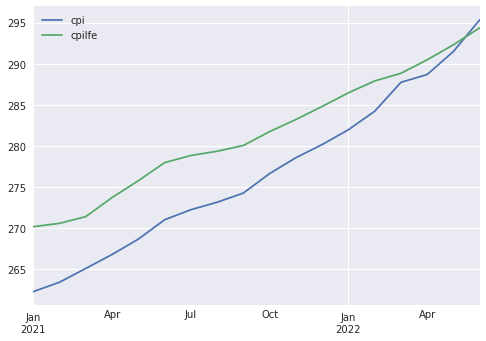

In [90]:
df["2021":].plot()

In [91]:
df["cpi_yoy"] = df.cpi.pct_change(12)
df["cpilfe_yoy"] = df.cpilfe.pct_change(12)
df["2021":].tail()

,cpi,cpilfe,cpi_yoy,cpilfe_yoy
2022-02-01,284.182,287.878,0.079120,0.064157
2022-03-01,287.708,288.811,0.085576,0.064360
2022-04-01,288.663,290.455,0.082241,0.061337
2022-05-01,291.474,292.289,0.085164,0.060113
2022-06-01,295.328,294.354,0.089952,0.059125


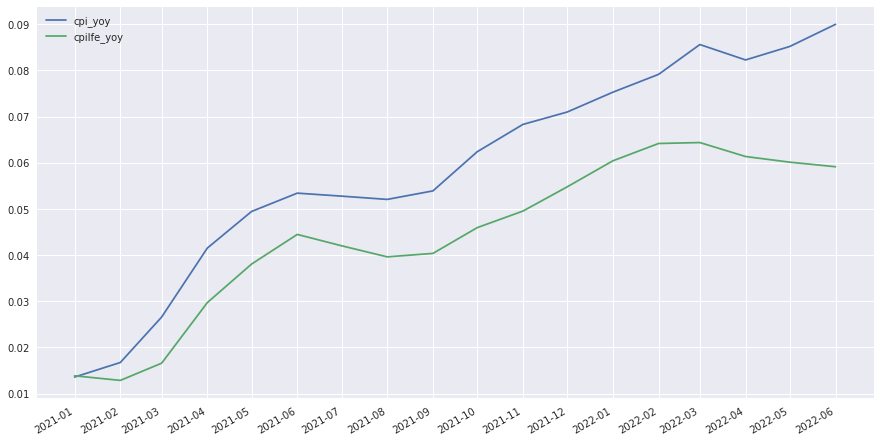

In [94]:
ax = df.loc["2021":,['cpi_yoy', 'cpilfe_yoy']].plot(figsize=(15, 8), x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()


In [95]:
df

,cpi,cpilfe,cpi_yoy,cpilfe_yoy
1947-01-01,21.480,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN
...,...,...,...,...
2022-02-01,284.182,287.878,0.079120,0.064157
2022-03-01,287.708,288.811,0.085576,0.064360
2022-04-01,288.663,290.455,0.082241,0.061337
2022-05-01,291.474,292.289,0.085164,0.060113


In [96]:
# compare fed rate with inflation 
df["fed_rate"] = fred.get_series('FEDFUNDS')
df

,cpi,cpilfe,cpi_yoy,cpilfe_yoy,fed_rate
1947-01-01,21.480,NaN,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-01,284.182,287.878,0.079120,0.064157,0.08
2022-03-01,287.708,288.811,0.085576,0.064360,0.20
2022-04-01,288.663,290.455,0.082241,0.061337,0.33
2022-05-01,291.474,292.289,0.085164,0.060113,0.77


<AxesSubplot:>

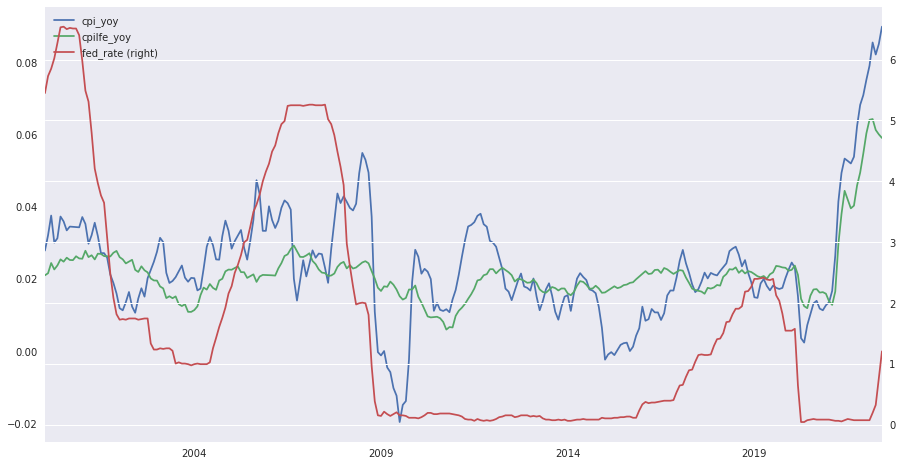

In [104]:
df.loc['2000':, ['cpi_yoy', 'cpilfe_yoy', 'fed_rate']].plot(secondary_y='fed_rate', figsize=(15, 8))

In [107]:
df["unemployment"] = fred.get_series('UNRATE')
df

,cpi,cpilfe,cpi_yoy,cpilfe_yoy,fed_rate,unemployment
1947-01-01,21.480,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-02-01,284.182,287.878,0.079120,0.064157,0.08,3.8
2022-03-01,287.708,288.811,0.085576,0.064360,0.20,3.6
2022-04-01,288.663,290.455,0.082241,0.061337,0.33,3.6
2022-05-01,291.474,292.289,0.085164,0.060113,0.77,3.6


In [109]:
# fed rate is more related to inflation than employment rate
df.corr()

,cpi,cpilfe,cpi_yoy,cpilfe_yoy,fed_rate,unemployment
cpi,1.000000,0.999321,-0.180228,-0.355616,-0.432797,0.177416
cpilfe,0.999321,1.000000,-0.311407,-0.366385,-0.488663,0.038799
cpi_yoy,-0.180228,-0.311407,1.000000,0.927425,0.722516,0.066212
cpilfe_yoy,-0.355616,-0.366385,0.927425,1.000000,0.763363,0.185479
fed_rate,-0.432797,-0.488663,0.722516,0.763363,1.000000,0.065217
unemployment,0.177416,0.038799,0.066212,0.185479,0.065217,1.000000


In [110]:
# take more recent years
df.loc["2000":].corr

,cpi,cpilfe,cpi_yoy,cpilfe_yoy,fed_rate,unemployment
cpi,1.000000,0.993749,0.100096,0.285139,-0.560627,0.008180
cpilfe,0.993749,1.000000,0.078555,0.291235,-0.546653,-0.032355
cpi_yoy,0.100096,0.078555,1.000000,0.738675,0.291496,-0.379840
cpilfe_yoy,0.285139,0.291235,0.738675,1.000000,0.174919,-0.470640
fed_rate,-0.560627,-0.546653,0.291496,0.174919,1.000000,-0.539663
unemployment,0.008180,-0.032355,-0.379840,-0.470640,-0.539663,1.000000


<AxesSubplot:>

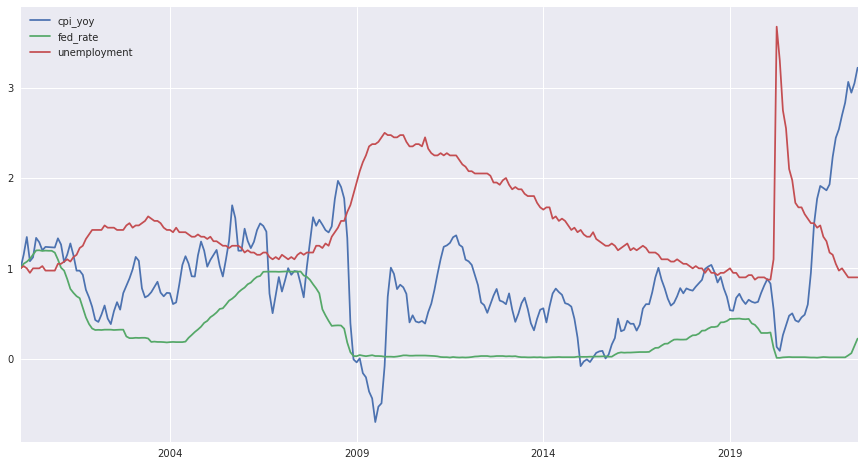

In [119]:
df.loc["2000":,["cpi_yoy", "fed_rate", "unemployment"]].div(df.loc["2000":].iloc[0]).dropna(axis=1).plot(figsize=(15, 8))